In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("temperature.csv",index_col="datetime",parse_dates = ["datetime"])

In [3]:
data.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,284.607306,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45253 entries, 2012-10-01 12:00:00 to 2017-11-30 00:00:00
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Vancouver          44458 non-null  float64
 1   Portland           45252 non-null  float64
 2   San Francisco      44460 non-null  float64
 3   Seattle            45250 non-null  float64
 4   Los Angeles        45250 non-null  float64
 5   San Diego          45252 non-null  float64
 6   Las Vegas          45252 non-null  float64
 7   Phoenix            45250 non-null  float64
 8   Albuquerque        45252 non-null  float64
 9   Denver             45252 non-null  float64
 10  San Antonio        45252 non-null  float64
 11  Dallas             45249 non-null  float64
 12  Houston            45250 non-null  float64
 13  Kansas City        45252 non-null  float64
 14  Minneapolis        45240 non-null  float64
 15  Saint Louis        45252 non-null  

In [5]:
data.shape

(45253, 36)

In [6]:
percent_missing = data.isnull().sum()
percent_missing.sort_values(inplace=True)

<AxesSubplot:>

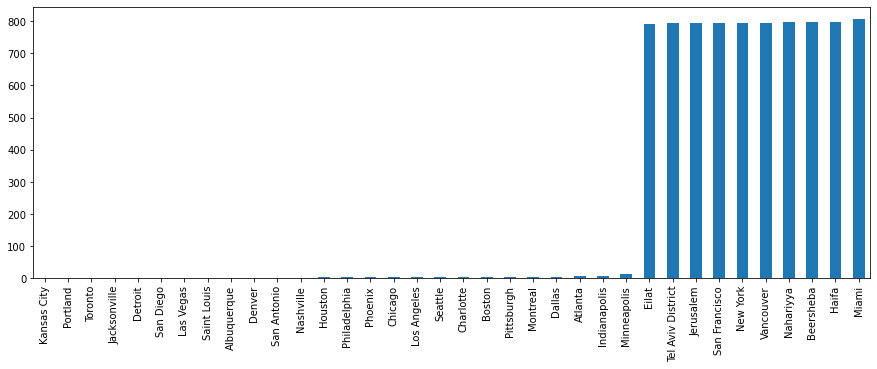

In [7]:
percent_missing.plot.bar(figsize = (15,5))

36 ttributes have missing values, 10 over 50% of all data.

In [8]:
new_data = data.drop(columns = ["Vancouver","San Francisco","Miami", "New York","Beersheba","Tel Aviv District","Eilat","Haifa","Nahariyya","Jerusalem"])

In [9]:
new_data.shape

(45253, 26)

In [10]:
new_data.isnull().sum()

Portland         1
Seattle          3
Los Angeles      3
San Diego        1
Las Vegas        1
Phoenix          3
Albuquerque      1
Denver           1
San Antonio      1
Dallas           4
Houston          3
Kansas City      1
Minneapolis     13
Saint Louis      1
Chicago          3
Nashville        2
Indianapolis     7
Atlanta          6
Detroit          1
Jacksonville     1
Charlotte        3
Pittsburgh       3
Toronto          1
Philadelphia     3
Montreal         3
Boston           3
dtype: int64

In [11]:
new_data.columns

Index(['Portland', 'Seattle', 'Los Angeles', 'San Diego', 'Las Vegas',
       'Phoenix', 'Albuquerque', 'Denver', 'San Antonio', 'Dallas', 'Houston',
       'Kansas City', 'Minneapolis', 'Saint Louis', 'Chicago', 'Nashville',
       'Indianapolis', 'Atlanta', 'Detroit', 'Jacksonville', 'Charlotte',
       'Pittsburgh', 'Toronto', 'Philadelphia', 'Montreal', 'Boston'],
      dtype='object')

In [12]:
cols = ['Portland', 'Seattle', 'Los Angeles', 'San Diego',
       'Las Vegas', 'Phoenix', 'Albuquerque', 'Denver', 'San Antonio',
       'Dallas', 'Houston', 'Kansas City', 'Minneapolis', 'Saint Louis',
       'Chicago', 'Nashville', 'Indianapolis', 'Atlanta', 'Detroit',
       'Jacksonville', 'Charlotte', 'Pittsburgh', 'Toronto', 'Philadelphia',
       'Montreal', 'Boston']

new_data[cols]=new_data[cols].fillna(new_data.median().iloc[0])

In [13]:
new_data.isnull().sum()

Portland        0
Seattle         0
Los Angeles     0
San Diego       0
Las Vegas       0
Phoenix         0
Albuquerque     0
Denver          0
San Antonio     0
Dallas          0
Houston         0
Kansas City     0
Minneapolis     0
Saint Louis     0
Chicago         0
Nashville       0
Indianapolis    0
Atlanta         0
Detroit         0
Jacksonville    0
Charlotte       0
Pittsburgh      0
Toronto         0
Philadelphia    0
Montreal        0
Boston          0
dtype: int64

In [14]:
new_data.head()

,Portland,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,...,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Pittsburgh,Toronto,Philadelphia,Montreal,Boston
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,284.320000,284.320000,284.320000,284.320000,284.320000,284.320000,284.320000,284.320000,284.320000,284.320000,...,284.320000,284.320000,284.320000,284.320000,284.320000,284.320000,284.320000,284.320000,284.320000,284.320000
2012-10-01 13:00:00,282.080000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,289.290000,289.740000,...,283.850000,294.030000,284.030000,298.170000,288.650000,281.000000,286.260000,285.630000,285.830000,287.170000
2012-10-01 14:00:00,282.083252,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,284.607306,289.303649,289.762974,...,283.889394,294.035341,284.069789,298.205230,288.650172,281.024767,286.262541,285.663208,285.834650,287.186092
2012-10-01 15:00:00,282.091866,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,289.338497,289.830767,...,283.941919,294.049702,284.173965,298.299595,288.650582,281.088319,286.269518,285.756824,285.847790,287.231672
2012-10-01 16:00:00,282.100481,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,289.373345,289.898560,...,283.994444,294.064063,284.278140,298.393961,288.650991,281.151870,286.276496,285.850440,285.860929,287.277251


In [15]:
data = new_data.head(500)

In [16]:
data.describe()

,Portland,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,...,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Pittsburgh,Toronto,Philadelphia,Montreal,Boston
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,286.137761,285.374230,293.633265,293.529538,295.617129,298.661253,288.249714,283.752573,294.649891,292.878844,...,284.355505,290.257684,284.909605,296.586491,289.065904,285.086919,283.765594,287.026140,283.516386,286.296522
std,4.750200,3.970479,4.286628,3.942380,5.573943,5.553051,5.738076,6.488787,5.028540,5.700610,...,5.220639,4.469469,4.649483,3.700769,5.018814,5.713231,3.982222,5.204616,4.339011,4.885511
min,276.360000,278.670000,284.320000,284.320000,284.320000,284.320000,273.150000,271.180000,283.780000,277.930000,...,272.950000,280.720000,274.980000,284.320000,279.940000,273.170000,272.890000,272.750000,271.730000,271.640000
25%,282.240000,282.072500,290.852500,291.080000,291.510000,294.477500,284.432500,278.660000,290.627500,289.257500,...,281.109688,286.830000,281.275000,293.840000,285.030000,281.070000,281.187500,282.987500,280.597500,283.205000
50%,285.815000,284.995000,292.733333,292.490000,295.163333,297.460000,287.800000,284.050000,295.305000,293.100000,...,284.388384,290.275000,284.790000,297.045000,288.658976,283.945000,283.615000,287.344151,283.750000,287.020000
75%,289.622500,287.602500,296.185000,295.512500,299.772500,303.442500,292.765000,288.631833,298.142500,297.530000,...,287.887500,294.120377,288.432500,299.270000,292.532500,289.460000,286.512500,290.907500,286.087587,289.575000
max,300.550000,296.110000,307.710000,306.200000,309.850000,312.010000,301.410000,299.530000,305.060000,302.740000,...,297.520000,300.320000,296.910000,304.810000,300.710000,297.290000,293.200000,298.600000,293.630000,297.940000


In [17]:
data.shape

(500, 26)

array([<AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>],
      dtype=object)

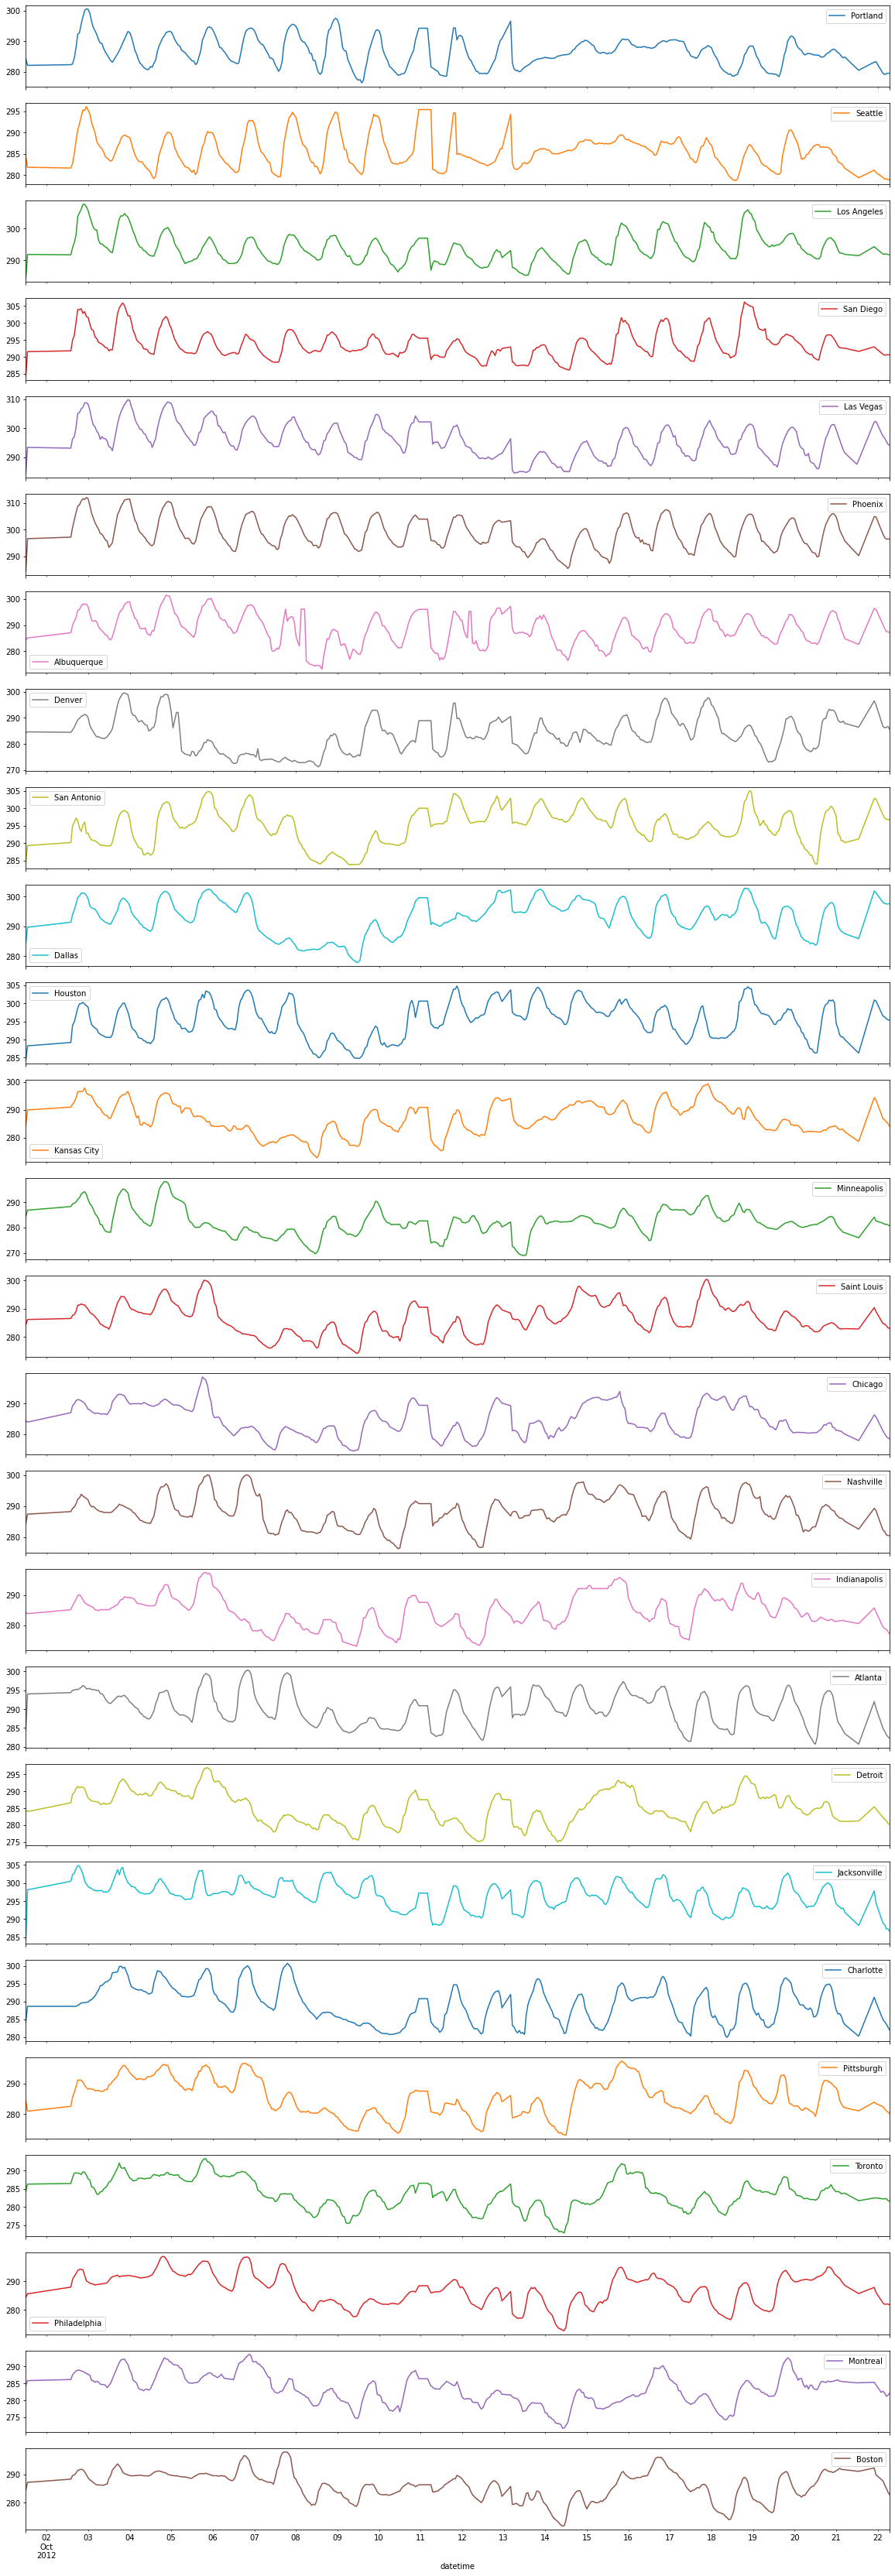

In [18]:
data.plot(subplots =  True, figsize = (20, 60))

<AxesSubplot:>

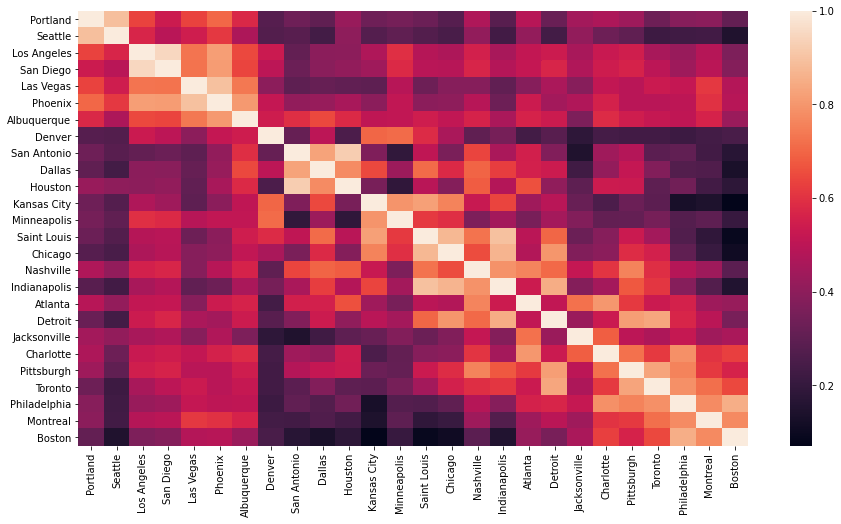

In [19]:
fig = plt.subplots(figsize=(15,8)) 
sns.heatmap(data.corr())

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2012-10-01 12:00:00 to 2012-10-22 07:00:00
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Portland      500 non-null    float64
 1   Seattle       500 non-null    float64
 2   Los Angeles   500 non-null    float64
 3   San Diego     500 non-null    float64
 4   Las Vegas     500 non-null    float64
 5   Phoenix       500 non-null    float64
 6   Albuquerque   500 non-null    float64
 7   Denver        500 non-null    float64
 8   San Antonio   500 non-null    float64
 9   Dallas        500 non-null    float64
 10  Houston       500 non-null    float64
 11  Kansas City   500 non-null    float64
 12  Minneapolis   500 non-null    float64
 13  Saint Louis   500 non-null    float64
 14  Chicago       500 non-null    float64
 15  Nashville     500 non-null    float64
 16  Indianapolis  500 non-null    float64
 17  Atlanta       500 non-null    float6

In [21]:
data_month = new_data.resample("M").mean()

In [22]:
data_month.head()

,Portland,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,...,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Pittsburgh,Toronto,Philadelphia,Montreal,Boston
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-31,285.209441,284.329952,293.242947,292.808584,294.018489,297.517072,287.115945,282.893376,293.869550,292.157885,...,284.574716,289.466198,284.910311,295.590554,288.699122,285.325279,283.466990,286.942445,283.554922,285.976511
2012-11-30,281.761056,281.012396,289.276347,289.010924,287.529389,291.783389,280.600042,280.352875,290.106431,288.489563,...,278.359243,283.360396,277.864063,288.374062,282.178944,277.564028,277.473493,278.452139,274.771326,278.143479
2012-12-31,278.555784,278.315333,286.239209,286.137814,282.164206,285.024105,274.543923,273.493309,286.961119,284.236981,...,277.258857,282.571751,275.987745,288.255722,282.270587,277.159281,274.243503,277.916040,269.378626,275.696347
2013-01-31,275.151107,275.973781,284.742942,284.679862,279.081733,282.795489,271.810549,271.909805,284.923519,282.304120,...,272.590217,282.112394,271.820518,289.027162,280.698691,272.881292,271.084847,274.458473,264.600963,271.977641
2013-02-28,278.971179,279.159787,285.734333,285.246950,282.815446,284.963670,275.306948,272.796333,287.884889,284.835660,...,271.603043,280.288185,270.002635,288.352093,279.051833,270.993613,269.776530,273.751786,266.367277,272.096747


<BarContainer object of 39 artists>

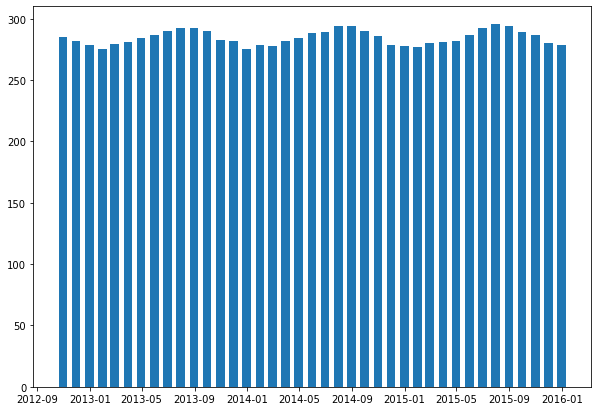

In [23]:
plt.figure(figsize = (10,7))
plt.bar(data_month["2012":"2015"].index, data_month.loc["2012":"2015","Portland"],width = 20)

<BarContainer object of 39 artists>

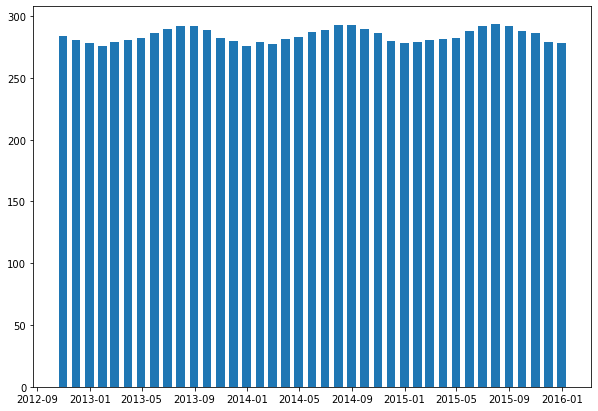

In [24]:
plt.figure(figsize = (10,7))
plt.bar(data_month["2012":"2015"].index, data_month.loc["2012":"2015","Seattle"],width = 20)

<BarContainer object of 39 artists>

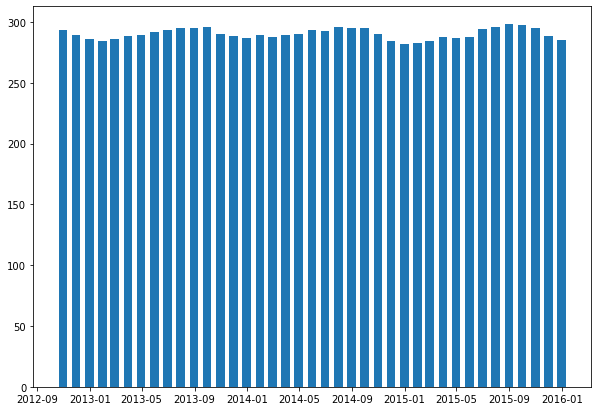

In [25]:
plt.figure(figsize = (10,7))
plt.bar(data_month["2012":"2015"].index, data_month.loc["2012":"2015","Los Angeles"],width = 20)

<AxesSubplot:xlabel='datetime'>

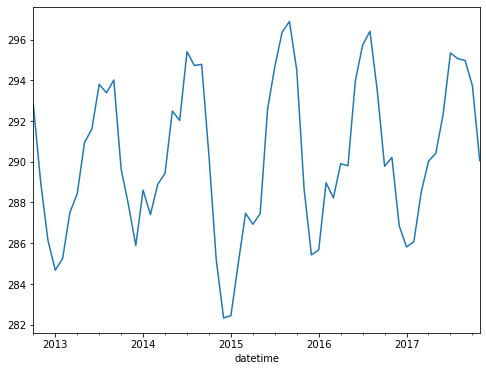

In [26]:
data_month["San Diego"].plot(figsize=(8, 6))

<AxesSubplot:xlabel='datetime'>

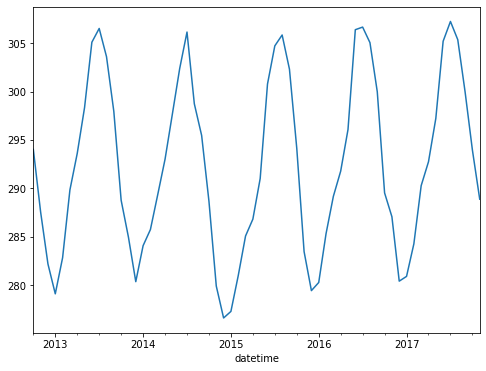

In [27]:
data_month["Las Vegas"].plot(figsize=(8, 6))

<AxesSubplot:xlabel='datetime'>

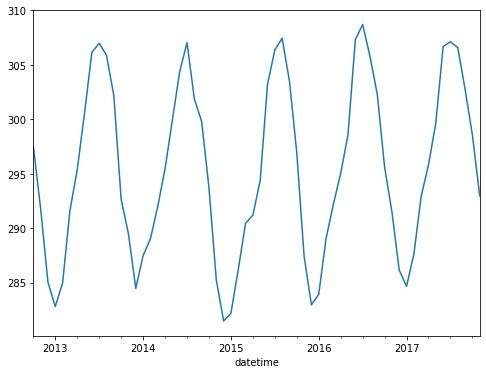

In [28]:
data_month["Phoenix"].plot(figsize=(8, 6))

<AxesSubplot:xlabel='datetime'>

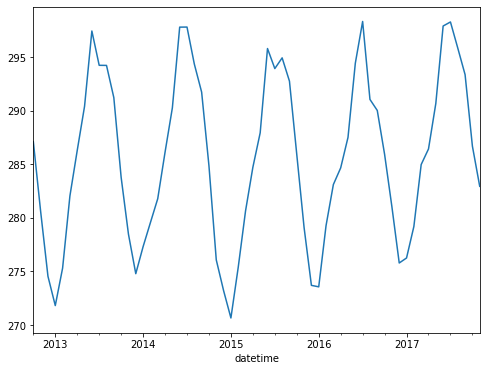

In [29]:
data_month["Albuquerque"].plot(figsize=(8, 6))

<AxesSubplot:xlabel='datetime'>

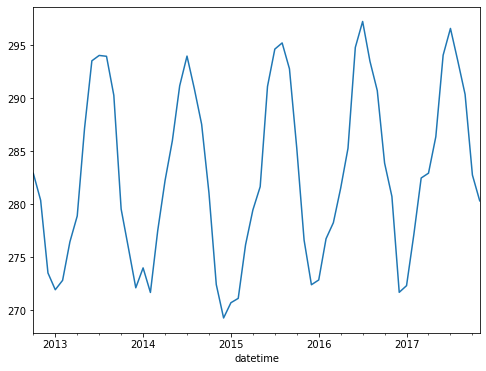

In [30]:
data_month["Denver"].plot(figsize=(8, 6))

<AxesSubplot:xlabel='datetime'>

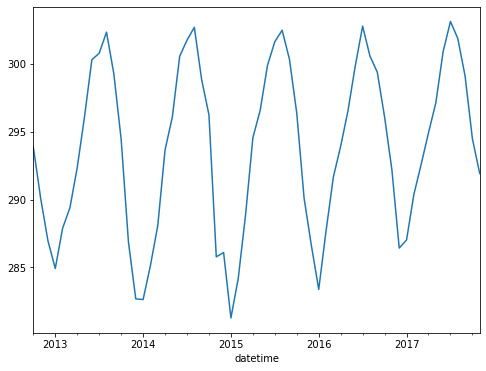

In [31]:
data_month["San Antonio"].plot(figsize=(8, 6))

<AxesSubplot:xlabel='datetime'>

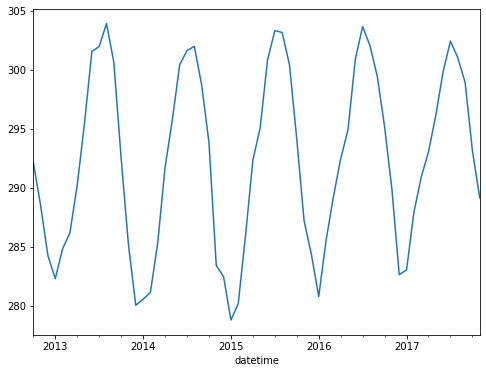

In [32]:
data_month["Dallas"].plot(figsize=(8, 6))

<AxesSubplot:xlabel='datetime'>

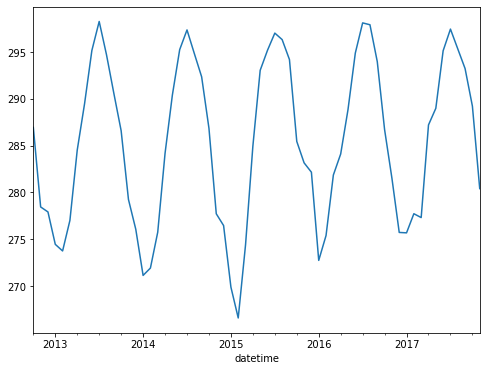

In [33]:
data_month["Philadelphia"].plot(figsize=(8, 6))

<AxesSubplot:xlabel='datetime'>

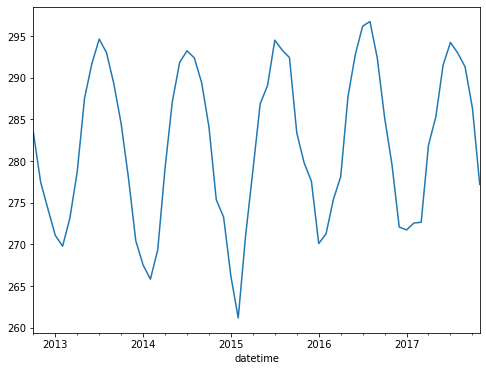

In [34]:
data_month["Toronto"].plot(figsize=(8, 6))

<AxesSubplot:xlabel='datetime'>

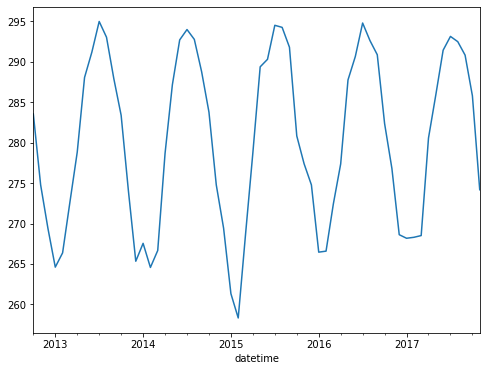

In [35]:
data_month["Montreal"].plot(figsize=(8, 6))

<AxesSubplot:xlabel='datetime'>

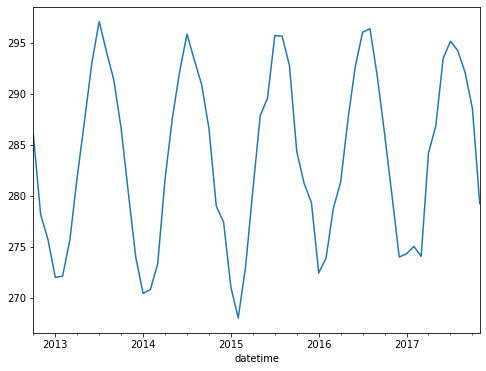

In [36]:
data_month["Boston"].plot(figsize=(8, 6))

In [37]:
from pylab import rcParams
import statsmodels.api as sm

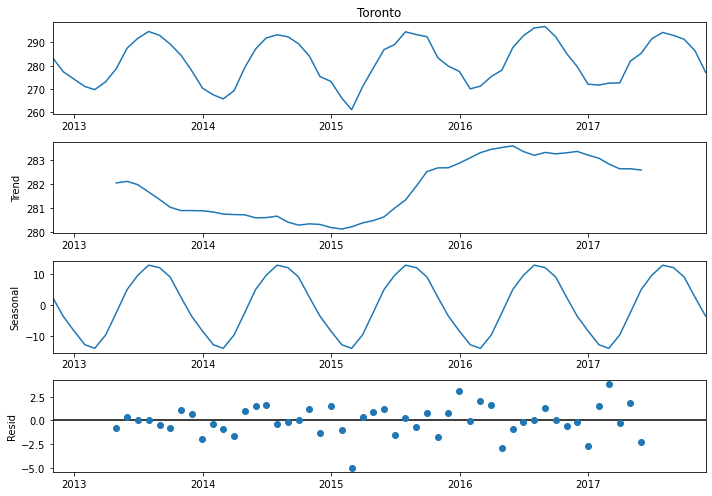

In [38]:
rcParams['figure.figsize'] = 10,7
decomposition = sm.tsa.seasonal_decompose(data_month["Toronto"],model='Additive')
fig = decomposition.plot()

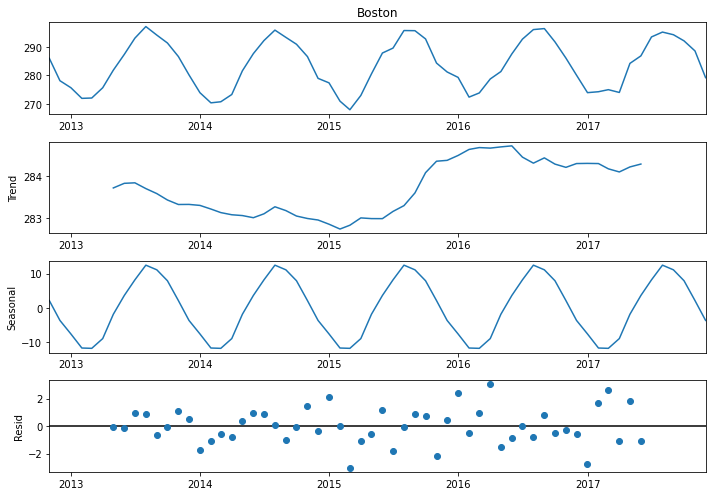

In [39]:
rcParams['figure.figsize'] = 10,7
decomposition = sm.tsa.seasonal_decompose(data_month["Boston"],model='Additive')
fig = decomposition.plot()

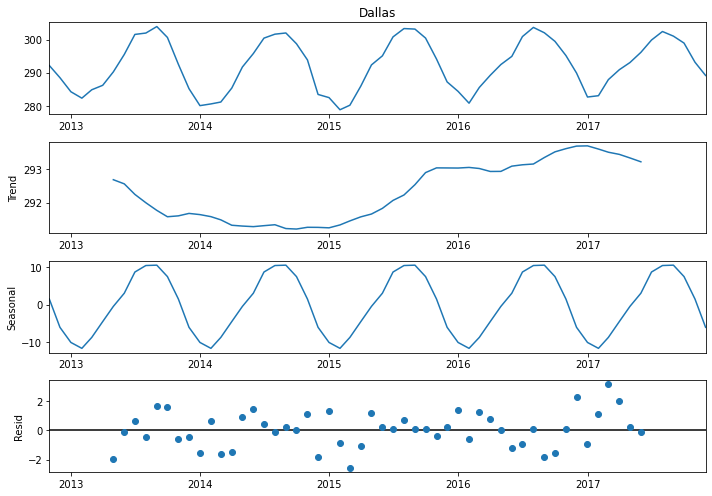

In [40]:
rcParams['figure.figsize'] = 10,7
decomposition = sm.tsa.seasonal_decompose(data_month["Dallas"],model='Additive')
fig = decomposition.plot()

#### Stationary or no!

In [41]:
from statsmodels.tsa.stattools import adfuller

In [42]:
res = adfuller (new_data.Toronto)

In [43]:
pval = res[1]

if pval < 0.05:
    print("stationary")
else:
    print("not stationary")

stationary


#### Moving Average

In [44]:
data1=new_data.head(100)
data1

,Portland,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,...,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Pittsburgh,Toronto,Philadelphia,Montreal,Boston
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,284.320000,284.320000,284.320000,284.320000,284.320000,284.320000,284.320000,284.320000,284.320000,284.320000,...,284.320000,284.320000,284.320000,284.320000,284.320000,284.320000,284.320000,284.320000,284.320000,284.320000
2012-10-01 13:00:00,282.080000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,289.290000,289.740000,...,283.850000,294.030000,284.030000,298.170000,288.650000,281.000000,286.260000,285.630000,285.830000,287.170000
2012-10-01 14:00:00,282.083252,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,284.607306,289.303649,289.762974,...,283.889394,294.035341,284.069789,298.205230,288.650172,281.024767,286.262541,285.663208,285.834650,287.186092
2012-10-01 15:00:00,282.091866,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,289.338497,289.830767,...,283.941919,294.049702,284.173965,298.299595,288.650582,281.088319,286.269518,285.756824,285.847790,287.231672
2012-10-01 16:00:00,282.100481,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,289.373345,289.898560,...,283.994444,294.064063,284.278140,298.393961,288.650991,281.151870,286.276496,285.850440,285.860929,287.277251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-05 11:00:00,284.240000,281.080000,289.670000,291.150000,295.770000,295.930000,286.620000,275.350000,295.310000,291.220000,...,285.290000,287.090000,288.010000,295.510000,291.340000,288.130000,286.960000,292.280000,285.090000,288.560000
2012-10-05 12:00:00,283.520000,280.640000,289.820000,291.110000,295.220000,294.830000,285.910000,277.170000,295.460000,291.380000,...,286.220000,286.530000,287.640000,295.880000,291.530000,287.640000,286.930000,292.630000,285.040000,288.670000
2012-10-05 13:00:00,283.530000,281.140000,290.250000,290.930000,294.070000,294.570000,285.290000,276.930000,295.850000,292.000000,...,287.270000,288.550000,288.670000,297.900000,291.690000,289.420000,287.790000,293.500000,285.160000,289.100000


In [45]:
data1["EMA"]= data1["Toronto"].ewm(alpha = 0.4).mean()

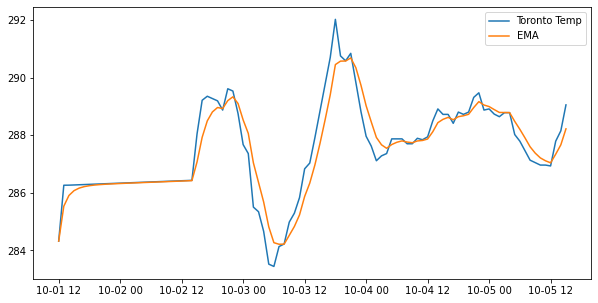

In [46]:
fig = plt.figure(figsize = (10,5))
plt.plot(data1["Toronto"], label= "Toronto Temp")
plt.plot(data1["EMA"], label = "EMA")
plt.legend()

In [47]:
data1["EMA_Detroit"]= data1["Detroit"].ewm(alpha = 0.4).mean()

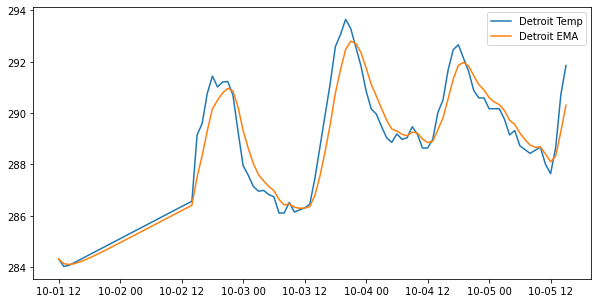

In [48]:
fig = plt.figure(figsize = (10,5))
plt.plot(data1["Detroit"], label= "Detroit Temp")
plt.plot(data1["EMA_Detroit"], label = "Detroit EMA")
plt.legend()

In [53]:
data1["SMA_Montreal"] = data1["Montreal"].rolling(window = 3).mean()

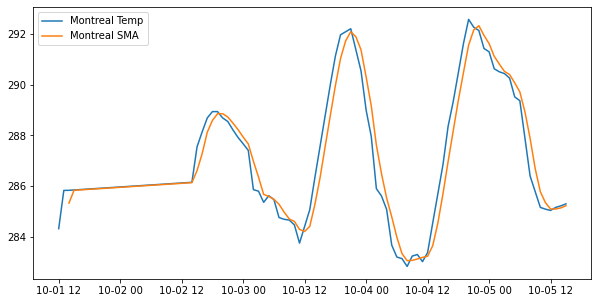

In [54]:
fig = plt.figure(figsize = (10,5))
plt.plot(data1["Montreal"], label= "Montreal Temp")
plt.plot(data1["SMA_Montreal"], label = "Montreal SMA")
plt.legend()